# Prediction Delivery Time

# EDA Dataset

## Explore

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

In [8]:
list1 =np.array(range(10))
list1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
df_ebay = pd.read_csv('../data/raw/ebayShort.csv', index_col=0)

As the data is too big, we first working in the shortcut of the total data with 1 million rows.

In [42]:
# Look at the first 5 row

df_ebay.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,B2C,25454,3.0,2019-03-26 15:11:00.000-07:00,0,0.0,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,5,1,LETTER,1
1,C2C,6727381,2.0,2018-06-02 12:53:00.000-07:00,0,3.0,3,5,11415-3528,62521,0,20.50,1,2018-06-01 13:43:54.000-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
2,B2C,18507,1.0,2019-01-07 16:22:00.000-05:00,0,4.5,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
3,B2C,4677,1.0,2018-12-17 16:56:00.000-08:00,0,0.0,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
4,B2C,4677,1.0,2018-07-27 16:48:00.000-07:00,0,0.0,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5


In [11]:
#Look at 5 random row
df_ebay.sample(5)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
719910,B2C,237751,2.0,2018-06-22 13:09:00.000-04:00,0,3.50,3,5,02738,07054,8,124.99,1,2018-06-21 22:45:48.000-04:00,2018-06-25,3,1,PACKAGE_THICK_ENVELOPE,719911
748922,B2C,48933,NaN,2018-08-20 15:59:00.000-04:00,1,10.65,2,5,33433,76002,0,85.00,1,2018-08-18 22:24:21.000-04:00,2018-08-22,32,1,PACKAGE_THICK_ENVELOPE,748923
378631,C2C,256483,3.0,2018-05-18 00:00:00.000-04:00,0,4.50,3,5,44077,40906,4,36.00,1,2018-05-18 13:44:22.000-04:00,2018-05-21,0,1,PACKAGE_THICK_ENVELOPE,378632
267266,C2C,258298,3.0,2019-04-13 12:07:00.000-04:00,0,2.35,3,5,46235,97045,0,6.25,1,2019-04-11 01:39:36.000-04:00,2019-04-17,10,1,LARGE_ENVELOPE,267267
742967,B2C,3709,1.0,2019-01-29 18:57:00.000-05:00,6,6.50,2,5,11361,94580,8,15.95,1,2019-01-28 12:21:20.000-05:00,2019-01-31,3,1,LETTER,742968


In [12]:
#check the shape of the dataset
df_ebay.shape

(1000000, 19)

In [13]:
print(f'There are {df_ebay.shape[0]} columns and {df_ebay.shape[1]} rows')

There are 1000000 columns and 19 rows


In [14]:
# Get a quick overview of dataset variables
df_ebay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   b2c_c2c                    1000000 non-null  object 
 1   seller_id                  1000000 non-null  int64  
 2   declared_handling_days     952820 non-null   float64
 3   acceptance_scan_timestamp  1000000 non-null  object 
 4   shipment_method_id         1000000 non-null  int64  
 5   shipping_fee               1000000 non-null  float64
 6   carrier_min_estimate       1000000 non-null  int64  
 7   carrier_max_estimate       1000000 non-null  int64  
 8   item_zip                   1000000 non-null  object 
 9   buyer_zip                  1000000 non-null  object 
 10  category_id                1000000 non-null  int64  
 11  item_price                 1000000 non-null  float64
 12  quantity                   1000000 non-null  int64  
 13  payment_datet

In [15]:
# top 5 rows showing only 'object' columns
df_ebay.select_dtypes('object').head()

,b2c_c2c,acceptance_scan_timestamp,item_zip,buyer_zip,payment_datetime,delivery_date,package_size
0,B2C,2019-03-26 15:11:00.000-07:00,97219,49040,2019-03-24 03:56:49.000-07:00,2019-03-29,LETTER
1,C2C,2018-06-02 12:53:00.000-07:00,11415-3528,62521,2018-06-01 13:43:54.000-07:00,2018-06-05,PACKAGE_THICK_ENVELOPE
2,B2C,2019-01-07 16:22:00.000-05:00,27292,53010,2019-01-06 00:02:00.000-05:00,2019-01-10,PACKAGE_THICK_ENVELOPE
3,B2C,2018-12-17 16:56:00.000-08:00,90703,80022,2018-12-16 10:28:28.000-08:00,2018-12-21,PACKAGE_THICK_ENVELOPE
4,B2C,2018-07-27 16:48:00.000-07:00,90703,55070,2018-07-26 18:20:02.000-07:00,2018-07-30,PACKAGE_THICK_ENVELOPE


<Figure size 1400x2600 with 0 Axes>

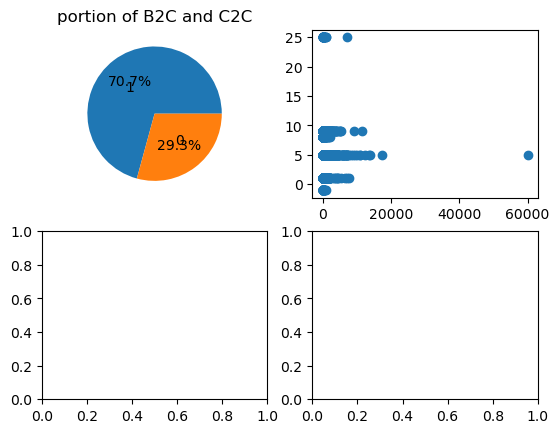

In [64]:
plt.figure(figsize=(14, 26))
plt.subplots(2, 2)

plt.subplot(2, 2, 1)
plt.pie(df_ebay['b2c_c2c'].value_counts(), labels= df_ebay['b2c_c2c'].unique(), labeldistance=0.5, autopct='%1.1f%%')
plt.title('portion of B2C and C2C')

plt.subplot(2, 2, 2)
plt.scatter( df_ebay['item_price'], df_ebay['carrier_max_estimate'])

plt.show()

## Data Cleaning

First let do some common checking in the dataset.
 -  Null value
 -  Duplicate row

In [ ]:
#Checking null
df_ebay.isna().sum()

b2c_c2c                          0
seller_id                        0
declared_handling_days       47180
acceptance_scan_timestamp        0
shipment_method_id               0
shipping_fee                     0
carrier_min_estimate             0
carrier_max_estimate             0
item_zip                         0
buyer_zip                        0
category_id                      0
item_price                       0
quantity                         0
payment_datetime                 0
delivery_date                    0
weight                           0
weight_units                     0
package_size                     0
record_number                    0
dtype: int64

There is 47180 missing value in total 1 million rows. We could delete it but I decide to have deepper look at it later


In [ ]:
# checking duplicate rows
df_ebay.duplicated().any()

False

There are no duplicate row in the database

In [35]:
#checking the b2c_c2c column
df_ebay['b2c_c2c'].value_counts()

B2C    707485
C2C    292515
Name: b2c_c2c, dtype: int64

Convert `b2c_c2c` column to binary

In [43]:
df_ebay['b2c_c2c']= np.where(df_ebay['b2c_c2c']=='B2C', 1, 0)

Test it

In [44]:
df_ebay.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,1,25454,3.0,2019-03-26 15:11:00.000-07:00,0,0.0,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,5,1,LETTER,1
1,0,6727381,2.0,2018-06-02 12:53:00.000-07:00,0,3.0,3,5,11415-3528,62521,0,20.50,1,2018-06-01 13:43:54.000-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
2,1,18507,1.0,2019-01-07 16:22:00.000-05:00,0,4.5,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
3,1,4677,1.0,2018-12-17 16:56:00.000-08:00,0,0.0,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
4,1,4677,1.0,2018-07-27 16:48:00.000-07:00,0,0.0,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5
